# Twitter Sentiment Analysis

With the large amount of data generated by users on social networks, social network monitoring techniques have become increasingly relevant. In this context, natural language processing (NLP) techniques have become essential to extract relevant information from this unstructured data.

This project aims to use NLP techniques to analyze sentiments in tweets using Gensim Word2Vec for text vectorization and the logistic regression algorithm from the sklearn library for sentiment classification into negative or positive.

The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. It is capable of capturing semantic relationships between words, which allows for superior performance in classification.

It is expected that the results obtained can contribute to the understanding of the sentiments expressed by Twitter users regarding certain topics and events.

This project has been divided into three notebooks:<br>
The first notebook concerns data visualization and cleaning.<br>
The second notebook concerns training of the word2vec and logistic regression models.<br>
The third notebook uses the previously trained models for classifying tweets extracted using the Twitter API and the tweepy library.

***

# Training models for Vectorization and Classification

## Importing Libs

In [1]:
import pandas as pd
import logging
import numpy as np
import nltk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from gensim.models import Word2Vec
from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline

### Reading cleaned dataframe

In [2]:
tweets = pd.read_csv('training.1600000.processed.noemoticon_cleaned.csv')
tweets.head(3)

,Unnamed: 0,target,text,text2,text3,text4,text5,text6
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot - awww, that's bummer. shoulda got...",switchfoot awww bummer shoulda got david carr ...,switchfoot awww bummer shoulda got david carr ...,switchfoot awww bummer shoulda got david carr ...,switchfoot awww bummer shoulda got david carr ...
1,1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting it... migh...,upset update facebook texting ... might cry re...,upset update facebook texting ... might cry re...,upset updat facebook text ... might cri result...,upset updat facebook text might cri result sch...
2,2,0,@Kenichan I dived many times for the ball. Man...,@kenichan dived many times ball. managed save ...,kenichan dived many times ball managed save 50...,kenichan dived many times ball managed save 50...,kenichan dive mani time ball manag save 50 res...,kenichan dive mani time ball manag save rest g...


### Dropping NaN rows

In [3]:
print(str(tweets['text6'].isnull().sum()) + ' NaN rows dropped.')
tweets = tweets.dropna()

2436 NaN rows dropped.


### Splitting data into train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(tweets['text6'], tweets['target'], random_state = 5, train_size=0.8)

### Training word2vec model

In [5]:
def train_w2v(dataset, skipgram=0, w=2, s=300, mc=25, a=0.01, ma=0.005):
    w2v_model = Word2Vec(sg=skipgram, window=w, vector_size=s, min_count=mc, alpha=a, min_alpha=ma)
    lst_tokens = [str(text).split(' ') for text in dataset]
    w2v_model.build_vocab(lst_tokens)
    w2v_model.train(lst_tokens, total_examples=w2v_model.corpus_count,epochs=30)
    return w2v_model

In [6]:
t1 = datetime.now()
w2v_cbow = train_w2v(X_train)
t2 = datetime.now()

print('Trained cbow model. The training process lasted {} seconds.'.format((t2-t1).total_seconds()))

#w2v_model.wv.most_similar('love')
#w2v_model.wv.most_similar('hate')

Trained cbow model. The training process lasted 162.914744 seconds.


In [7]:
t1 = datetime.now()
w2v_sg = train_w2v(X_train, 1)
t2 = datetime.now()

print('Trained skipgram model. The training process lasted {} seconds.'.format((t2-t1).total_seconds()))

Trained skipgram model. The training process lasted 287.983886 seconds.


### Testing cbow and skipgram models

In [8]:
w2v_cbow.wv.most_similar('love')

[('luv', 0.5849282145500183),
 ('looov', 0.45483580231666565),
 ('amaz', 0.44399788975715637),
 ('loooov', 0.425089955329895),
 ('awesom', 0.40732699632644653),
 ('loov', 0.4010430872440338),
 ('ador', 0.3999859094619751),
 ('lovin', 0.3918304741382599),
 ('lovee', 0.3797128200531006),
 ('loveeee', 0.372554212808609)]

In [9]:
w2v_cbow.wv.most_similar('hate')

[('dislik', 0.4721071720123291),
 ('stupid', 0.4685707688331604),
 ('suck', 0.44395411014556885),
 ('ugh', 0.3938283324241638),
 ('despis', 0.37211552262306213),
 ('horribl', 0.361753910779953),
 ('ughh', 0.3568624258041382),
 ('grrrrr', 0.346954345703125),
 ('curs', 0.3455856740474701),
 ('annoy', 0.3438183665275574)]

In [10]:
w2v_sg.wv.most_similar('love')

[('luv', 0.5536301732063293),
 ('loveeee', 0.5412459969520569),
 ('loov', 0.5080604553222656),
 ('lovee', 0.47727322578430176),
 ('loooov', 0.47482970356941223),
 ('looov', 0.46860796213150024),
 ('looooov', 0.4548555612564087),
 ('godbless', 0.4415279030799866),
 ('looooooov', 0.4210857152938843),
 ('lurv', 0.42051947116851807)]

In [11]:
w2v_sg.wv.most_similar('hate')

[('suck', 0.45180192589759827),
 ('detest', 0.4472542703151703),
 ('despis', 0.4416430592536926),
 ('stupid', 0.41650936007499695),
 ('dislik', 0.41416698694229126),
 ('goddamnit', 0.39653173089027405),
 ('ugh', 0.39172059297561646),
 ('horribl', 0.3875507414340973),
 ('pissin', 0.3855118155479431),
 ('suckss', 0.38387471437454224)]

### Vectorizing data with word2vec models

In [12]:
ws_tokenizer = tokenize.WhitespaceTokenizer()

def vectorizing (text, modelo):
    x = len(text)
    y = 300
    matrix = np.zeros((x,y))
    
    for i in range(x):
        #print(i)
        words = ws_tokenizer.tokenize(text.iloc[i])
        
        for word in words:
            if word in modelo.wv:
                matrix[i] += modelo.wv.get_vector(word)
                #print(len(matrix[i]))
    return matrix

In [13]:
matrix_train_cbow = vectorizing(X_train, w2v_cbow)
matrix_test_cbow = vectorizing(X_test, w2v_cbow)

matrix_train_sg= vectorizing(X_train, w2v_sg)
matrix_test_sg = vectorizing(X_test, w2v_sg)


### Testing different vectorizing methods in classification

In [14]:
def classificate_lr (X_train, X_test, y_train, y_test):
    t1 = datetime.now()
    logistic_regression = LogisticRegression(solver = "lbfgs", max_iter=10000)
    logistic_regression.fit(X_train, y_train)
    t2 = datetime.now()
    
    y_pred = logistic_regression.predict(X_test)
    
    print('Trained model. The training process lasted {} seconds.'.format((t2-t1).total_seconds()))
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
          
    print('Accuracy Score: {:.2f}%'.format(accuracy * 100))
    print('Precision Score: {:.2f}%'.format(precision * 100))
    print('Recall Score: {:.2f}%'.format(recall * 100))
    print('F1 Score: {:.2f}%'.format(f1 * 100))
    
    return logistic_regression, y_pred

In [15]:
def conf_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    ax= plt.subplot()
    hm = sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues", square=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    
    ax.set_xlabel('Predicted label');
    ax.set_ylabel('True label'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); 
    ax.yaxis.set_ticklabels(['0', '1']);   

### Testing classification with CountVectorizer and TfidfVectorizer

Trained model. The training process lasted 4.008283 seconds.
Accuracy Score: 59.50%
Precision Score: 58.63%
Recall Score: 64.72%
F1 Score: 61.52%


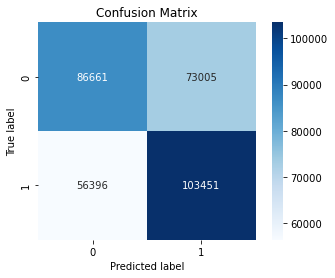

In [16]:
count_vectorizer = CountVectorizer(max_features=300)
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.fit_transform(X_test)

lr_cv, y_pred_cv = classificate_lr(X_train_cv, X_test_cv, y_train, y_test)
conf_matrix(y_test, y_pred_cv)

Trained model. The training process lasted 4.78321 seconds.
Accuracy Score: 59.41%
Precision Score: 58.70%
Recall Score: 63.63%
F1 Score: 61.07%


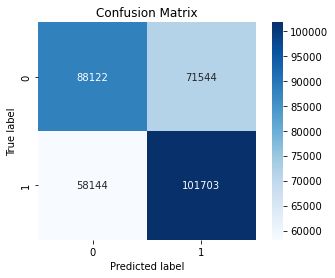

In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features=300)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.fit_transform(X_test)

lr_tfidf, y_pred_tfidf = classificate_lr(X_train_tfidf, X_test_tfidf, y_train, y_test)
conf_matrix(y_test, y_pred_tfidf)

### Testing classification with Word2Vec Models (Cbow and SkipGram)

Trained model. The training process lasted 32.659667 seconds.
Accuracy Score: 75.38%
Precision Score: 74.38%
Recall Score: 77.46%
F1 Score: 75.89%


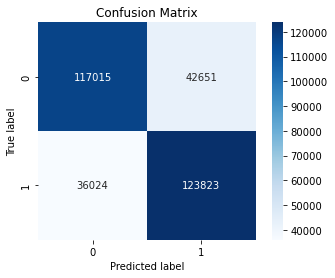

In [18]:
#word2vec cbow model
lr_cbow, y_pred_cbow = classificate_lr(matrix_train_cbow, matrix_test_cbow, y_train, y_test)
conf_matrix(y_test, y_pred_cbow)

Trained model. The training process lasted 12.600307 seconds.
Accuracy Score: 75.27%
Precision Score: 74.46%
Recall Score: 76.96%
F1 Score: 75.69%


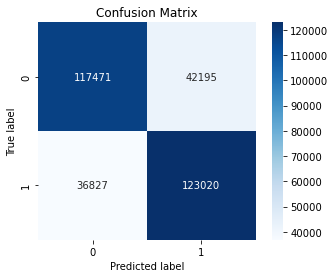

In [19]:
#word2vec skipgram model
lr_sg, y_pred_sg = classificate_lr(matrix_train_sg, matrix_test_sg, y_train, y_test)
conf_matrix(y_test, y_pred_sg)

### Exporting Word2Vec models

In [20]:
w2v_cbow.save("models/word2vec_cbow.model")

In [21]:
w2v_sg.save("models/word2vec_sg.model")

### Exporting Logistic Regression models

In [22]:
with open("models/lr_cbow.pkl", "wb") as f:
    pickle.dump(lr_cbow, f)

In [23]:
with open("models/lr_sg.pkl", "wb") as f:
    pickle.dump(lr_sg, f)